In [1]:
import numpy as np 
import pandas as pd 

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import re
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('ytb_comments.csv')

In [3]:
df= df.replace('\n','',regex=True)
df = df[df.label != -1]

rm_html = lambda x: re.sub(r'(<.*>)','',x)
rm_dble_slash = lambda x: re.sub(r'(\\)',' ',x)
rm_timecode = lambda x: re.sub(r'(\d+:\d+)','',x)

df['text'] = df['text'].apply(rm_html)
df['text'] = df['text'].apply(rm_dble_slash)
df['text'] = df['text'].apply(rm_timecode)


In [4]:
df.head()

,text,label
0,Still not sure why this channel is so underrat...,1
1,Ctrl + L to clear the screen. He did that at,1
2,Actually the one thingwhich I really wanted to...,1
3,As i learn programming on my windows machine I...,1
4,for some reason it keeps saying this when i do...,0


In [5]:
sentences = df['text']

vectorizer = CountVectorizer(min_df=0, lowercase=False,stop_words='english')
vectorizer.fit(sentences)
len(vectorizer.vocabulary_)

1827

In [6]:
X = vectorizer.transform(sentences).toarray()
Y = df['label'].to_numpy()

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

classifier = LogisticRegression()
classifier.fit(X_train, y_train)
score = classifier.score(X_test, y_test)

print("Accuracy:", score)

Accuracy: 0.8289473684210527


In [8]:
table = metrics.confusion_matrix(classifier.predict(X_test),y_test, labels=[0,1])
pd.DataFrame(table)

,0,1
0,2,1
1,25,124


In [9]:
test = vectorizer.transform(["There is an error when i run the import selenium code. Not sure how to fix that. Help pleaseee"]).toarray()
classifier.predict_proba(test)

array([[0.30985401, 0.69014599]])

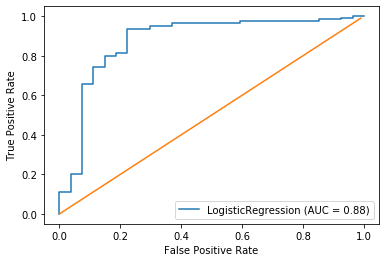

In [10]:
metrics.plot_roc_curve(classifier,X_test, y_test)  
plt.plot(np.arange(0,1,0.01),np.arange(0,1,0.01))

In [21]:
predict= pd.DataFrame(classifier.predict_proba(X_test),columns=['neg','pos'])

In [22]:
z = np.arange(0,1,0.01)
acc = []
precis = []
sensi = []
speci = []

for seuil in z:
    choose = lambda val: 0 if val<seuil else 1 
    predict['class'] = predict['pos'].apply(choose)
    table = metrics.confusion_matrix(predict['class'],y_test, labels=[0,1])
    tn, fp, fn, tp = table.ravel()
    
    acc.append((tp+tn)/(tp+tn+fn+fp))
    precis.append(tp/(tp+fp))
    sensi.append(tp/(tn+fn))
    speci.append(tn/(tn+fp))

C:\Users\benoi\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in longlong_scalars
  app.launch_new_instance()


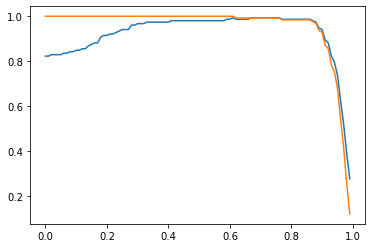

In [23]:
plt.plot(z,acc)
plt.plot(z,precis)

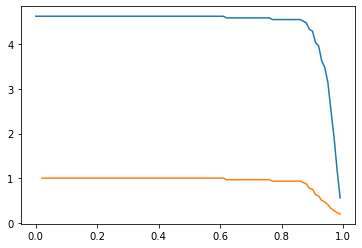

In [24]:
plt.plot(z,sensi)
plt.plot(z,speci)

In [25]:
seuil = 0.85
choose = lambda val: 0 if val<seuil else 1 
predict['class'] = predict['pos'].apply(choose)
table = metrics.confusion_matrix(predict['class'],y_test, labels=[0,1])
pd.DataFrame(table)

,0,1
0,27,2
1,0,123


In [26]:
joblib.dump(vectorizer,'vectorizer_saved.joblib')

['vectorizer_saved.joblib']

In [27]:
classifier = LogisticRegression()
classifier.fit(X,Y)
joblib.dump(classifier, 'model_saved.joblib')

['model_saved.joblib']